In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import resample


In [ ]:
data = pd.read_csv('../data/processed/Loan_Default_Cleaned.csv')
# data = pd.read_csv('../data/processed/Loan_Default_Cleaned_No_Noice.csv') # Some columns are removed

In [ ]:
df_majority = data[data['Status'] == 0]
df_minority = data[data['Status'] == 1]

# Downsample majority
df_majority_down = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)

# Upsample minority
df_minority_up = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)

# Choose either approach (downsampling or upsampling)
data_balanced = pd.concat([df_majority_down, df_minority])
# data_balanced = pd.concat([df_majority, df_minority_up])

print(data_balanced['Status'].value_counts())  # Should now be balanced

In [3]:
# Rename column
data.rename(columns={'Status': 'Loan_Status'}, inplace=True)

# Define features and target variable
X = data.drop(columns=['Loan_Status'])  # Drop target variable
y = data['Loan_Status']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 1.0000


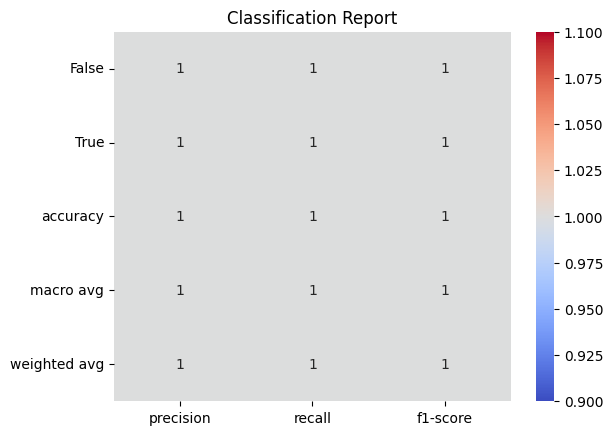

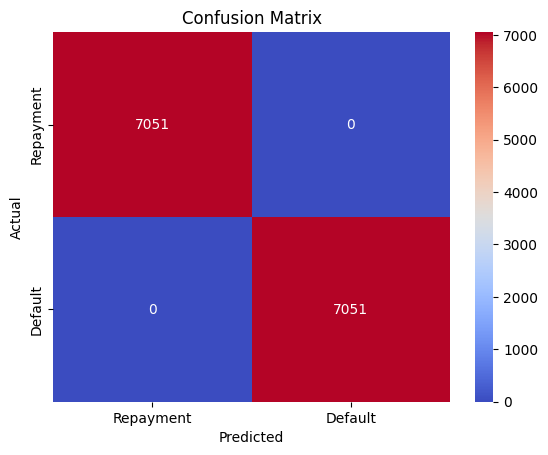

In [4]:
# Classification report as heatmap
report = classification_report(y_test, y_pred, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='coolwarm')
plt.title('Classification Report')
plt.show()

# Confusion Matrix visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Repayment', 'Default'], yticklabels=['Repayment', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()